In [7]:
import tensorflow as tf
import keras
from keras.api import models,layers
from matplotlib import pyplot as plt

In [4]:
import os

# Path to the main folder containing the class subfolders
main_folder = "/Users/harshnahata/Main/Deep Learning/cnn/agriculture-tech/PlantVillage"

# Loop through each subfolder
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    
    # Ensure it's a directory
    if os.path.isdir(subfolder_path):
        # Loop through each file in the subfolder
        for i, filename in enumerate(os.listdir(subfolder_path), start=1):
            file_path = os.path.join(subfolder_path, filename)
            
            # Ensure it's a file
            if os.path.isfile(file_path):
                # Create the new filename
                file_extension = os.path.splitext(filename)[1]  # Keep the original file extension
                new_filename = f"{subfolder}_{i}{file_extension}"
                new_file_path = os.path.join(subfolder_path, new_filename)
                
                # Rename the file
                os.rename(file_path, new_file_path)
                print(f"Renamed: {file_path} -> {new_file_path}")


Renamed: /Users/harshnahata/Main/Deep Learning/cnn/agriculture-tech/PlantVillage/Potato___Early_blight/acb84d77-5b1c-4beb-be27-99fee467bf1f___RS_Early.B 7577.JPG -> /Users/harshnahata/Main/Deep Learning/cnn/agriculture-tech/PlantVillage/Potato___Early_blight/Potato___Early_blight_1.JPG
Renamed: /Users/harshnahata/Main/Deep Learning/cnn/agriculture-tech/PlantVillage/Potato___Early_blight/bc7552e4-3901-41b8-8bef-727eeca4270e___RS_Early.B 7942.JPG -> /Users/harshnahata/Main/Deep Learning/cnn/agriculture-tech/PlantVillage/Potato___Early_blight/Potato___Early_blight_2.JPG
Renamed: /Users/harshnahata/Main/Deep Learning/cnn/agriculture-tech/PlantVillage/Potato___Early_blight/1994cd3e-4000-4c56-bede-d35a1eecc287___RS_Early.B 6867.JPG -> /Users/harshnahata/Main/Deep Learning/cnn/agriculture-tech/PlantVillage/Potato___Early_blight/Potato___Early_blight_3.JPG
Renamed: /Users/harshnahata/Main/Deep Learning/cnn/agriculture-tech/PlantVillage/Potato___Early_blight/d8a8d6e5-d82d-4f7c-aac5-183e85549d9b

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

# Loading the images TF/Keras

In [ ]:
dataset_images = keras.api.preprocessing.image_dataset_from_directory(
    "Images",
    shuffle=False,
    image_size = (256,256),
    batch_size = 32
    )

class_names = dataset_images.class_names

# Visualising Image 

In [5]:

plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1): # first batch of 32 images
    print(image_batch[0]) # image vector
    print(label_batch) # all the classes in the batch
    # for index in range(12):
    #     ax = plt.subplot(3,4,index+1)
    #     plt.title(class_names[label_batch[index]])
    #     plt.imshow(image_batch[index].numpy().astype("uint8"))
    #     plt.axis("off")
    # break
    

tf.Tensor(
[[[179. 177. 190.]
  [179. 177. 190.]
  [181. 179. 192.]
  ...
  [199. 197. 210.]
  [192. 190. 203.]
  [179. 177. 190.]]

 [[176. 174. 187.]
  [178. 176. 189.]
  [182. 180. 193.]
  ...
  [191. 189. 202.]
  [191. 189. 202.]
  [186. 184. 197.]]

 [[177. 175. 188.]
  [180. 178. 191.]
  [185. 183. 196.]
  ...
  [189. 187. 200.]
  [196. 194. 207.]
  [200. 198. 211.]]

 ...

 [[147. 144. 155.]
  [138. 135. 146.]
  [125. 122. 133.]
  ...
  [127. 119. 130.]
  [123. 115. 126.]
  [148. 140. 151.]]

 [[138. 135. 146.]
  [130. 127. 138.]
  [117. 114. 125.]
  ...
  [151. 143. 154.]
  [143. 135. 146.]
  [129. 121. 132.]]

 [[112. 109. 120.]
  [122. 119. 130.]
  [127. 124. 135.]
  ...
  [135. 127. 138.]
  [123. 115. 126.]
  [111. 103. 114.]]], shape=(256, 256, 3), dtype=float32)
tf.Tensor([0 0 0 2 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 2 0 0 0 1 1 1 0 1 0 1 1 1], shape=(32,), dtype=int32)


2024-12-12 22:12:26.771081: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<Figure size 1000x1000 with 0 Axes>

# Splitting the Dataset

In [5]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1 # to check
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size) # takes the x number of the dataset
    val_ds = ds.skip(train_size).take(val_size) # skips that amt and takes next val_size dataset
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [ ]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset) 
len(train_ds)

54

# Prefetching

Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step s, the input pipeline is reading the data for step s+1. Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data.


# Cache
The cache() function will store the data in memory after the first epoch. So, during subsequent epochs, TensorFlow can load the data directly from memory, which is faster than loading from disk repeatedly. Caching avoids redundant computations and re-loading, as TensorFlow reuses the cached data in subsequent epochs rather than reading and transforming it repeatedly.

When preprocessing steps like resizing, normalizing, or encoding are applied, caching keeps the processed data for re-use, saving compute cycles.

# Shuffle 
.shuffle(1000) function will still work on the CPU, ensuring the dataset’s randomness.
Shuffling makes each training batch unique, which prevents the model from memorizing data patterns across epochs and improves generalization.

# Prefetch
The .prefetch(buffer_size=tf.data.AUTOTUNE) function allows your CPU to fetch the next batch of data while the current batch is being processed. This overlap improves performance by minimizing idle time, even without a GPU.

ex- While the GPU (or CPU, if no GPU is available) is processing the current batch, prefetching loads the next batch in the background. This way, as soon as the model finishes processing one batch, the next batch is ready.

tf.data.AUTOTUNE dynamically adjusts the buffer size based on available system resources.



In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Data preprocessing & Data Augmentation
Definin the PreProcessing and Augmentation pipeline

In [8]:
from keras.src.layers.preprocessing.rescaling import Rescaling
from keras.src.layers.preprocessing.image_preprocessing.resizing import Resizing
from keras.src.layers.preprocessing.image_preprocessing.random_rotation import (
    RandomRotation,
)
from keras.src.layers.preprocessing.image_preprocessing.random_brightness import (
    RandomBrightness,
)
from keras.src.layers.preprocessing.image_preprocessing.random_flip import (
    RandomFlip,
)

resize_and_rescale = tf.keras.Sequential([ # PreProcessing
  Resizing(IMAGE_SIZE, IMAGE_SIZE), 
  Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([ # Data Augmentation
  RandomBrightness([-0.5, 0.5]),
  RandomRotation(0.5),
  RandomFlip("horizontal_and_vertical")
])



# Applying Data Augmentation to Train Dataset

In [9]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


# Model Building
CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [10]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS) # rgb channel = 3
n_classes = 3

""" Using Sequential Method for creating model instead of Funtional way"""
model = models.Sequential([
    resize_and_rescale, # data preprocessing layer integrated with model so that whenever image is passed it get preprocessed automatically
    #first convulational layer
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    #After the convolutional and pooling layers, the feature maps are in a 3D shape 
    #(height, width, channels). The Flatten layer converts these into a 1D vector to feed into the dense 
    #(fully connected) layers.


    # Hidden dense layer
    layers.Dense(64, activation='relu'),

    # output layer
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling the Model

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


# Training

In [13]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=2,
    epochs=50,
)
# The History object gets returned by the fit() method of models.This object stores details about the 
# training process, such as the loss and any specified metrics (e.g., accuracy) for each epoch. 
# The history object allows you to visualize or analyze how these values changed over the course of
# training.


Epoch 1/50
54/54 - 42s - 769ms/step - accuracy: 0.5289 - loss: 0.8858 - val_accuracy: 0.5104 - val_loss: 0.8849
Epoch 2/50
54/54 - 37s - 684ms/step - accuracy: 0.6748 - loss: 0.6932 - val_accuracy: 0.7292 - val_loss: 0.5812
Epoch 3/50
54/54 - 37s - 685ms/step - accuracy: 0.7593 - loss: 0.5088 - val_accuracy: 0.8333 - val_loss: 0.4274
Epoch 4/50
54/54 - 39s - 720ms/step - accuracy: 0.8466 - loss: 0.3683 - val_accuracy: 0.8542 - val_loss: 0.3422
Epoch 5/50
54/54 - 41s - 754ms/step - accuracy: 0.8976 - loss: 0.2437 - val_accuracy: 0.9115 - val_loss: 0.2226
Epoch 6/50
54/54 - 39s - 731ms/step - accuracy: 0.8929 - loss: 0.2538 - val_accuracy: 0.8229 - val_loss: 0.4461
Epoch 7/50
54/54 - 38s - 705ms/step - accuracy: 0.9126 - loss: 0.2379 - val_accuracy: 0.9323 - val_loss: 0.1907
Epoch 8/50
54/54 - 43s - 794ms/step - accuracy: 0.9363 - loss: 0.1671 - val_accuracy: 0.9271 - val_loss: 0.1890
Epoch 9/50
54/54 - 44s - 810ms/step - accuracy: 0.9334 - loss: 0.1644 - val_accuracy: 0.8906 - val_loss:

# Evaluating the Model

In [14]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.9734 - loss: 0.0692


# Plotting Accuracy and Loss Curves

In [15]:
print(history.history.keys())
#['accuracy', 'loss', 'val_accuracy', 'val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


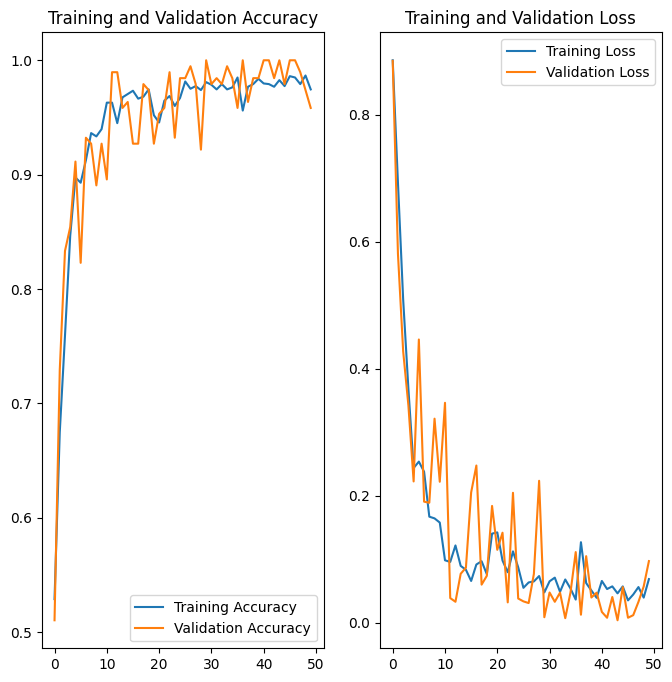

In [16]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
predicted label: Potato___Early_blight


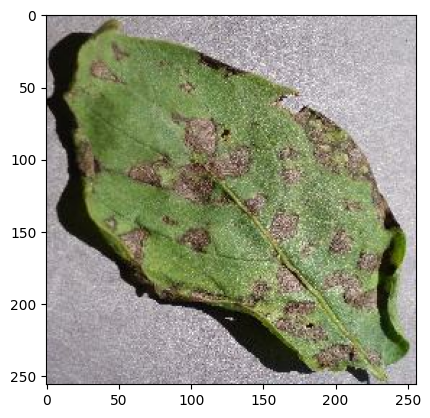

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


2024-12-04 12:14:56.333104: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


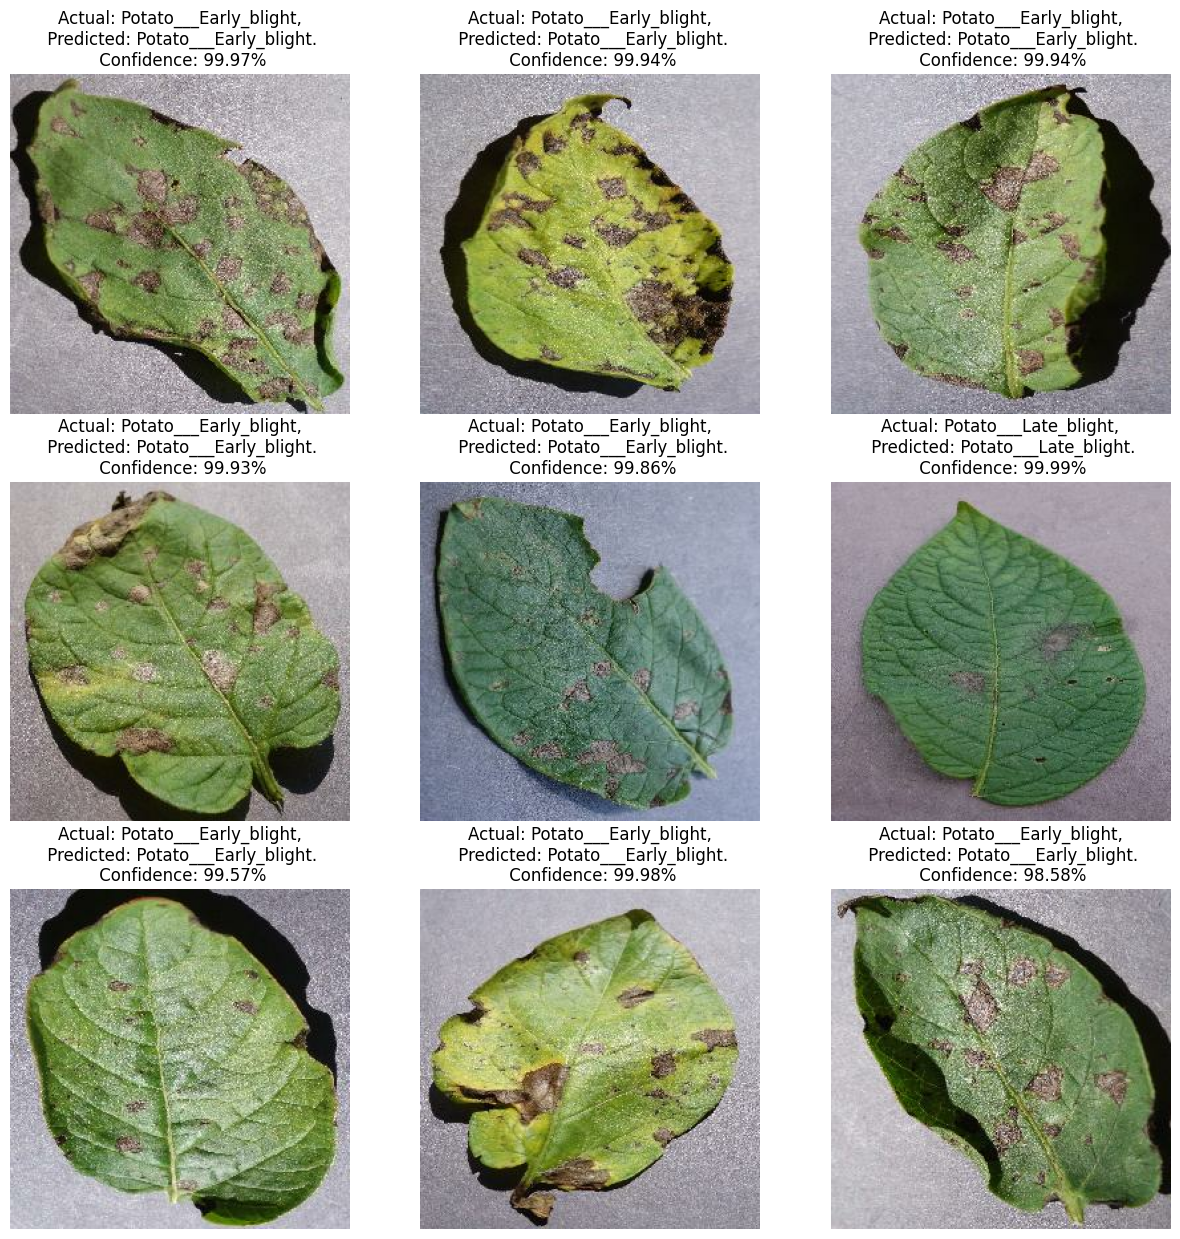

In [18]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# Saving the Model with versions

In [26]:
import os

# Define the file path
model_version = 1
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)
model_path = f"{model_dir}/{model_version}.keras"

# Save the model
model.save(model_path)

print(f"Model saved successfully in Keras format: {model_path}")


Model saved successfully in Keras format: saved_models/1.keras


JSON Format

In [28]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.weights.h5")

In [9]:
filename = "Potato___Late_blight_5.JPG"
folder_name = filename.split('_')
print(folder_name)
foldername = folder_name[0]+"___"+folder_name[3]+"_"+folder_name[4]
print(foldername)

['Potato', '', '', 'Late', 'blight', '5.JPG']
Potato___Late_blight
